In [1]:
import numpy as np
import pandas as pd
import urllib.request
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab


In [2]:

df = pd.read_csv("diamonds_train.csv", index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [3]:
"""dispersiones = sns.pairplot(df)"""
#mirar imagenes de dispersiones, no puedo runnearlo aqui que me peta todo  -> tambien esta la matriz de correlaciones 
"""correlaciones= df.corr()
ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlaciones,annot=True)"""
#mirar imagen de correlaciones, me peta todo si lo hago aqui

'correlaciones= df.corr()\nax = plt.subplots(figsize=(10,10))\nsns.heatmap(correlaciones,annot=True)'

In [4]:
#he entendido que si son las medidas del diamante, no puede haber un diamante que tenga 2 medidas, es decir que seria como en 2d 
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [5]:
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]

df = df[(df["z"]<30)&(df["z"]>2)]

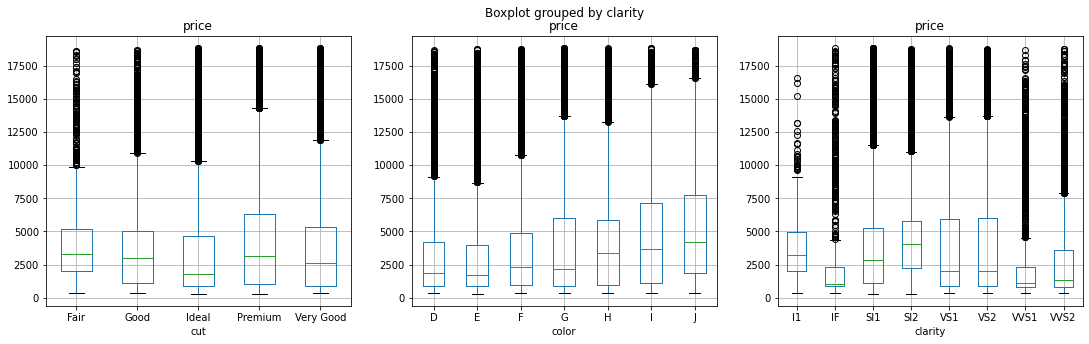

In [6]:

valores_deseados=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(valores_deseados), figsize=(18,5))

for v , i in zip(valores_deseados, range(len(valores_deseados))):
    df.boxplot(column='price', by=v, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#segun la matriz de correlaciones, los valores de x,y,z y cart estan relacionados y el resto no, pero sin embargo, al realizar el analisis con graficos de caja se demuestra que el color, la claridad y el corte tambien afectan al precio -> esto se observa debido a que los valores de las cajas no son los mismos y dependiendo de cada una de las caracteristicas varia sustancialmente. por lo tanto, me quedo con esas y dropeo depth y table que no tienen ninguna relevancia

In [7]:

#he decidido modificarlos yo manualmente para darles el valor deseado je
print("Antes:",df['cut'].unique())
df['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)
print("Después:",df['cut'].unique())
print("Antes:",df['color'].unique())
df['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)
print("Después:",df['color'].unique())
print("Antes:", df['clarity'].unique())
df['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)
print("Después:",df['color'].unique())

Antes: ['Ideal' 'Very Good' 'Premium' 'Good' 'Fair']
Después: [4 2 5 1 3]
Antes: ['H' 'D' 'F' 'G' 'I' 'E' 'J']
Después: [3 7 5 4 2 6 1]
Antes: ['VS2' 'VVS2' 'VS1' 'IF' 'SI1' 'SI2' 'VVS1' 'I1']
Después: [3 7 5 4 2 6 1]


In [8]:
df.drop(["depth","table"], axis=1, inplace=True) #columnas useless fuera 

In [13]:
df.info() #no hay valores nan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40322 entries, 0 to 40344
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40322 non-null  float64
 1   cut      40322 non-null  int64  
 2   color    40322 non-null  int64  
 3   clarity  40322 non-null  int64  
 4   x        40322 non-null  float64
 5   y        40322 non-null  float64
 6   z        40322 non-null  float64
 7   price    40322 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 2.8 MB


In [14]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(df)

# Adding Target Variable to the data
DataForML_Numeric['price']=df['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,cut,color,clarity,x,y,z,price
0,1.21,4,3,5,6.73,6.70,4.23,6134
1,0.28,2,7,7,4.14,4.17,2.66,532
2,0.42,5,5,4,4.86,4.82,2.96,1103
3,0.26,4,3,8,4.16,4.12,2.53,600
4,1.10,1,4,2,6.52,6.55,4.14,4997


In [15]:
X= np.array(df.drop(["price"],axis =1)) #separo en X-y 
y= np.array(df["price"])

In [16]:
scale= StandardScaler()
scaled_data = scale.fit_transform(X) 
#he estandarizado los datos de x ya que creo que va a ser más sencillo para la computacion

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7) #habemos partición 

In [18]:

trees = DecisionTreeRegressor(max_depth=14,criterion='mse',random_state=7)



trees.fit(X_train,y_train)
y_pred_train = trees.predict(X_train)
y_pred_test = trees.predict(X_test)

print ('score train :', trees.score(X_train, y_train))
print ('score test: ', trees.score(X_test, y_test))
print ('score total:', trees.score(X, y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))


score train : 0.9928002468210771
score test:  0.9731299819948777
score total: 0.9888718967465101
RMSE: 651.7680894619531
RMSE: 337.6995264802832


In [69]:

forest = RandomForestRegressor(max_depth=20, n_estimators=1000,criterion='mse',random_state=7,n_jobs=-1, max_features=5)

forest.fit(X_train,y_train)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

print ('score train :', forest.score(X_train, y_train))
print ('score test: ', forest.score(X_test, y_test))
print ('score total:', forest.score(X, y))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))

score train : 0.9971463994819019
score test:  0.9809823139490326
score total: 0.9939182633486231
RMSE: 548.324879333049
RMSE: 212.6024353976775


In [67]:

forest = RandomForestRegressor(max_depth=20, n_estimators=1000,criterion='mse',random_state=7,n_jobs=-1, max_features=5)

forest.fit(X,y)


RandomForestRegressor(max_depth=13, max_features=5, n_estimators=1000,
                      n_jobs=-1, random_state=7)

In [21]:

trees = DecisionTreeRegressor(max_depth=14,criterion='mse',random_state=7)



trees.fit(X,y)

DecisionTreeRegressor(max_depth=14, random_state=7)

In [22]:
X_pred = pd.read_csv("diamonds_test.csv", index_col = 0)

In [23]:
X_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [24]:
print("Antes:",X_pred['cut'].unique())
X_pred['cut'].replace({'Good':1, 
                          'Very Good':2,
                          'Fair':3,
                          'Ideal':4,
                          'Premium':5
                         }, inplace=True)
print("Después:",X_pred['cut'].unique())
print("Antes:",X_pred['color'].unique())
X_pred['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)
print("Después:",X_pred['color'].unique())
print("Antes:", X_pred['clarity'].unique())
X_pred['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)
print("Después:",X_pred['color'].unique())

Antes: ['Ideal' 'Very Good' 'Good' 'Premium' 'Fair']
Después: [4 2 1 5 3]
Antes: ['H' 'D' 'I' 'E' 'F' 'G' 'J']
Después: [3 7 2 6 5 4 1]
Antes: ['SI2' 'IF' 'VS2' 'VVS1' 'SI1' 'VS1' 'I1' 'VVS2']
Después: [3 7 2 6 5 4 1]


In [25]:
X_pred.drop(["depth","table"], axis=1, inplace=True) 

In [26]:
X_pred.shape

(13449, 7)

In [64]:
predictions = forest.predict(X_pred)

In [28]:
predictions_trees = trees.predict(X_pred)

In [29]:
sample = pd.read_csv("sample_submission.csv", index_col = 0)
sample.head()

,price
id,
0,12132
1,11786
2,14684
3,15425
4,6724


In [65]:
submission = pd.DataFrame({"id": range(len(predictions)), "price": predictions})

In [31]:
submission.head()

,id,price
0,0,428.831350
1,1,2003.657899
2,2,9806.110732
3,3,499.958629
4,4,8705.868214


In [66]:
submission.to_csv("submission.csv", index = False)